### Importing neccessary packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, StackingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.options.display.max_columns=81

**Importing Dataset:**

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(f"Train data shape :{train.shape}")
print(f"Test data shape :{test.shape}")

Train data shape :(1460, 81)
Test data shape :(1459, 80)


In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### **Drop Id feature:** 
    Its not important feature so we drop it

In [6]:
train = train.drop(columns=['Id'])

In [7]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

**Count Null values in percentage:** 

In [8]:
# how many null values in feature values
for feature in train.columns:
    print(f"{feature} : {np.round(train[feature].isnull().mean(),4)}")

MSSubClass : 0.0
MSZoning : 0.0
LotFrontage : 0.1774
LotArea : 0.0
Street : 0.0
Alley : 0.9377
LotShape : 0.0
LandContour : 0.0
Utilities : 0.0
LotConfig : 0.0
LandSlope : 0.0
Neighborhood : 0.0
Condition1 : 0.0
Condition2 : 0.0
BldgType : 0.0
HouseStyle : 0.0
OverallQual : 0.0
OverallCond : 0.0
YearBuilt : 0.0
YearRemodAdd : 0.0
RoofStyle : 0.0
RoofMatl : 0.0
Exterior1st : 0.0
Exterior2nd : 0.0
MasVnrType : 0.0055
MasVnrArea : 0.0055
ExterQual : 0.0
ExterCond : 0.0
Foundation : 0.0
BsmtQual : 0.0253
BsmtCond : 0.0253
BsmtExposure : 0.026
BsmtFinType1 : 0.0253
BsmtFinSF1 : 0.0
BsmtFinType2 : 0.026
BsmtFinSF2 : 0.0
BsmtUnfSF : 0.0
TotalBsmtSF : 0.0
Heating : 0.0
HeatingQC : 0.0
CentralAir : 0.0
Electrical : 0.0007
1stFlrSF : 0.0
2ndFlrSF : 0.0
LowQualFinSF : 0.0
GrLivArea : 0.0
BsmtFullBath : 0.0
BsmtHalfBath : 0.0
FullBath : 0.0
HalfBath : 0.0
BedroomAbvGr : 0.0
KitchenAbvGr : 0.0
KitchenQual : 0.0
TotRmsAbvGrd : 0.0
Functional : 0.0
Fireplaces : 0.0
FireplaceQu : 0.4726
GarageType : 0

### **separating numerical feature :**

In [9]:
numerical_feature = {feature for feature in train.columns if train[feature].dtypes != 'O'}
print(f"Total no of Numerical feature : {len(numerical_feature)}")
print(f'Numerical Feature are: {numerical_feature}')

Total no of Numerical feature : 37
Numerical Feature are: {'SalePrice', 'BsmtFinSF2', 'GrLivArea', '1stFlrSF', 'MasVnrArea', 'YrSold', 'LotArea', 'TotRmsAbvGrd', 'TotalBsmtSF', 'BedroomAbvGr', 'BsmtFullBath', 'FullBath', 'GarageYrBlt', 'MoSold', 'Fireplaces', '3SsnPorch', 'WoodDeckSF', 'BsmtUnfSF', 'GarageCars', 'YearBuilt', 'YearRemodAdd', 'OverallQual', 'BsmtFinSF1', 'LotFrontage', 'MSSubClass', 'KitchenAbvGr', '2ndFlrSF', 'PoolArea', 'EnclosedPorch', 'BsmtHalfBath', 'ScreenPorch', 'OverallCond', 'HalfBath', 'OpenPorchSF', 'GarageArea', 'MiscVal', 'LowQualFinSF'}


In [10]:
discrete_feature = {feature for feature in numerical_feature if len(train[feature].unique())<25}
print(f'Total number of Discrete feature : {len(discrete_feature)}')
print(f"Discrete Feature are : {discrete_feature}")

Total number of Discrete feature : 18
Discrete Feature are : {'Fireplaces', 'BsmtHalfBath', '3SsnPorch', 'MSSubClass', 'GarageCars', 'KitchenAbvGr', 'OverallCond', 'TotRmsAbvGrd', 'HalfBath', 'BedroomAbvGr', 'OverallQual', 'MiscVal', 'PoolArea', 'BsmtFullBath', 'YrSold', 'FullBath', 'LowQualFinSF', 'MoSold'}


In [11]:
continuous_feature = {feature for feature in numerical_feature if feature not in discrete_feature}
print(f'Total number of Discrete feature : {len(continuous_feature)}')
print(f"Discrete Feature are : {continuous_feature}")

Total number of Discrete feature : 19
Discrete Feature are : {'SalePrice', 'GrLivArea', 'BsmtFinSF2', '1stFlrSF', 'MasVnrArea', 'LotArea', 'TotalBsmtSF', 'GarageYrBlt', 'WoodDeckSF', 'BsmtUnfSF', 'YearBuilt', 'YearRemodAdd', 'LotFrontage', 'BsmtFinSF1', '2ndFlrSF', 'EnclosedPorch', 'ScreenPorch', 'OpenPorchSF', 'GarageArea'}


### **separating categorical feature:**

In [12]:
categorical_feature = {feature for feature in train.columns if train[feature].dtypes == 'O'}
print(f"Total no of Categorical feature : {len(categorical_feature)}")
print(f'Categorical Feature are: {categorical_feature}')

Total no of Categorical feature : 43
Categorical Feature are: {'Fence', 'BsmtExposure', 'Heating', 'CentralAir', 'MSZoning', 'ExterCond', 'LandSlope', 'Condition2', 'GarageFinish', 'RoofStyle', 'BsmtCond', 'BsmtFinType2', 'SaleType', 'GarageType', 'KitchenQual', 'BldgType', 'HouseStyle', 'RoofMatl', 'Foundation', 'FireplaceQu', 'Exterior1st', 'HeatingQC', 'GarageQual', 'Utilities', 'Neighborhood', 'BsmtQual', 'Street', 'SaleCondition', 'LotShape', 'Exterior2nd', 'LotConfig', 'Functional', 'ExterQual', 'MasVnrType', 'Condition1', 'PoolQC', 'PavedDrive', 'BsmtFinType1', 'Electrical', 'LandContour', 'Alley', 'MiscFeature', 'GarageCond'}


### Explotary Data Analysis:

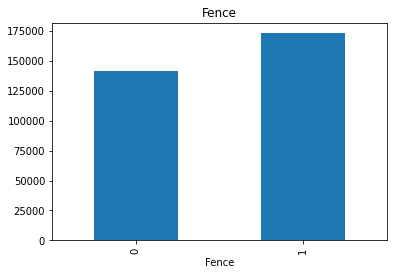

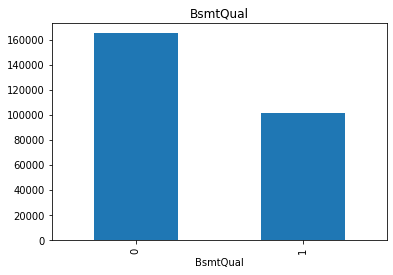

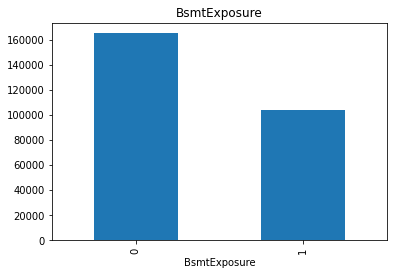

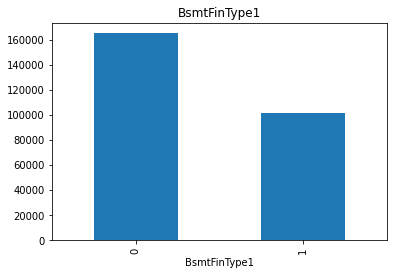

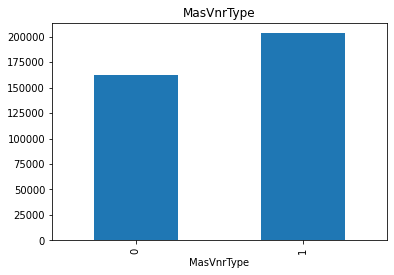

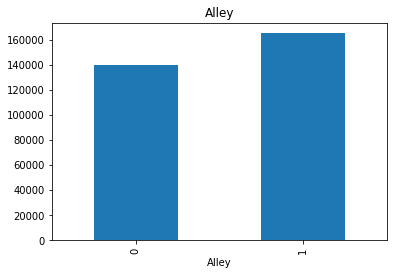

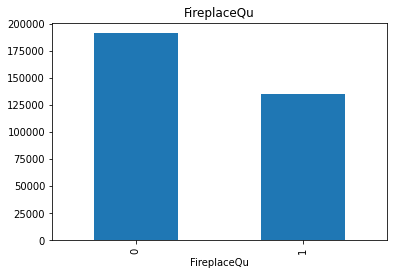

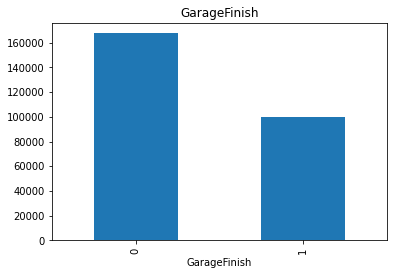

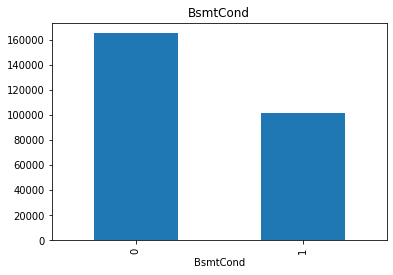

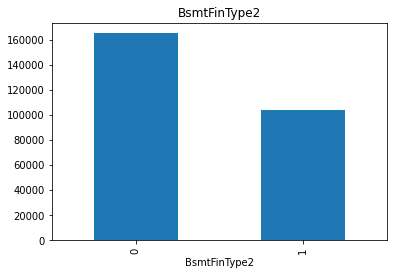

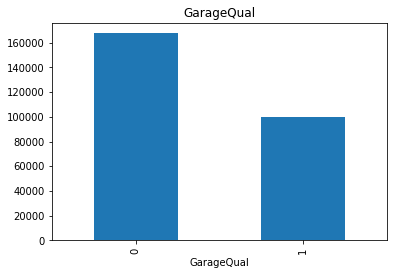

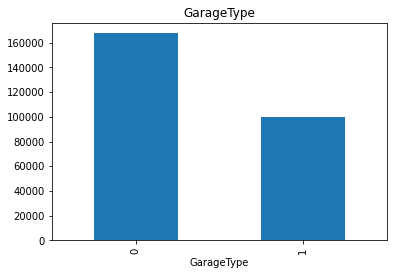

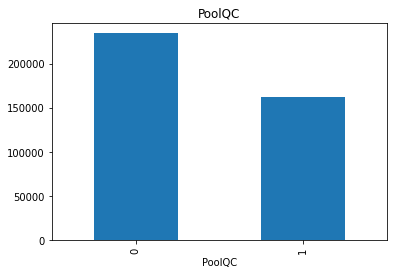

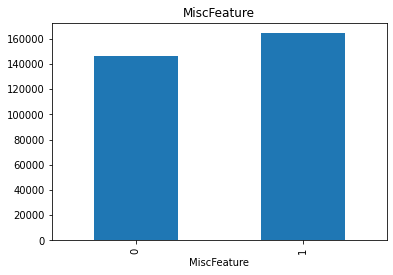

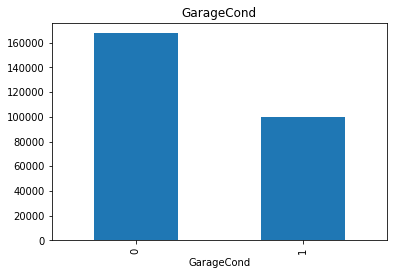

In [13]:
# Finding the relationship between the categorical feature with target feature
missing_value = {feature for feature in categorical_feature if train[feature].isnull().sum()>1}

for feature in missing_value:
    data = train.copy()
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(),1, 0)
    # let's calculate the mean SalePrice where the information is missing or present    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


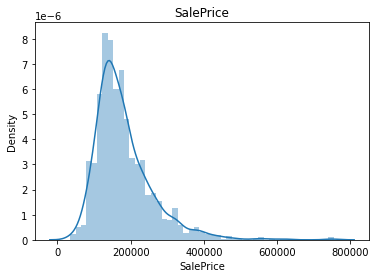

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


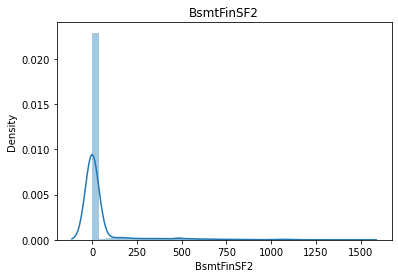

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


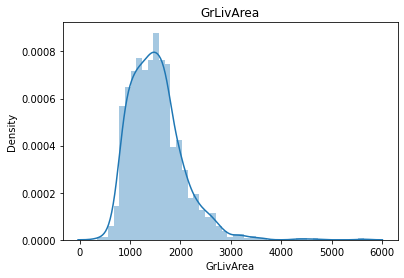

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


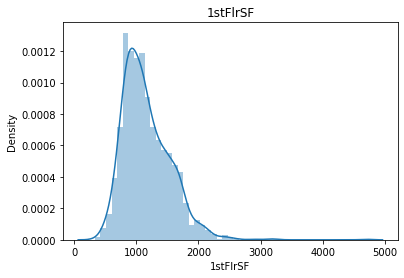

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


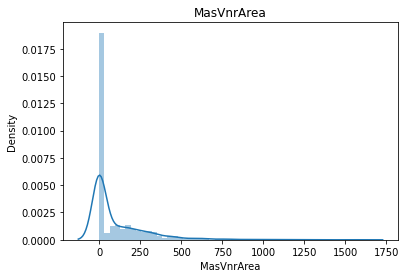

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


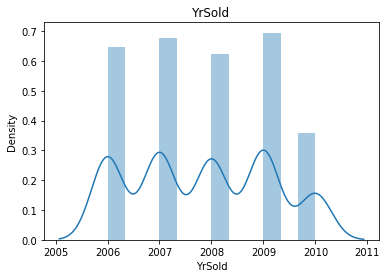

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


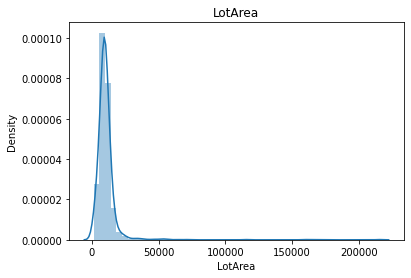

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


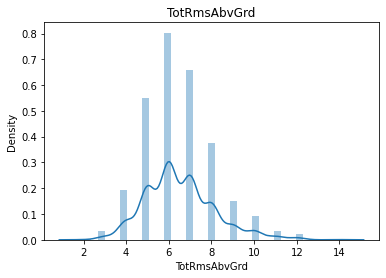

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


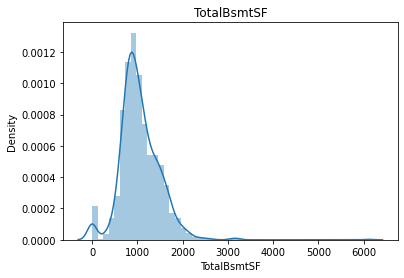

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


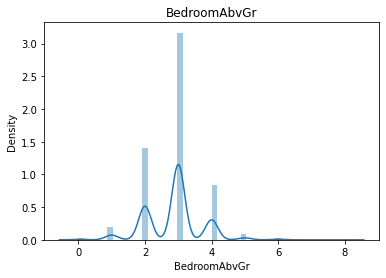

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


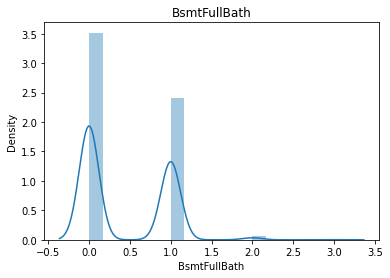

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


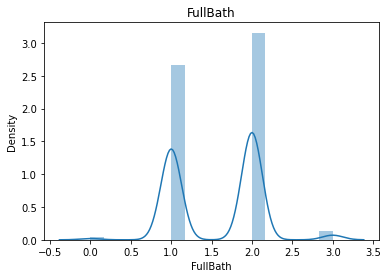

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


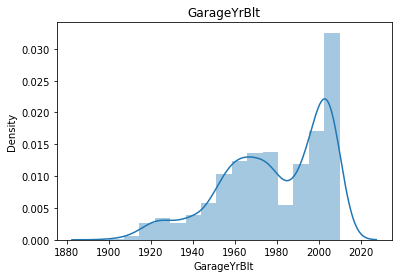

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


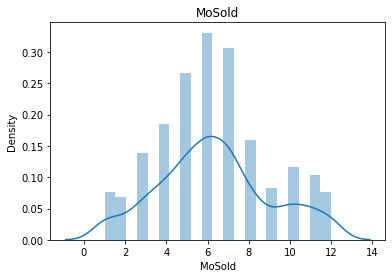

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


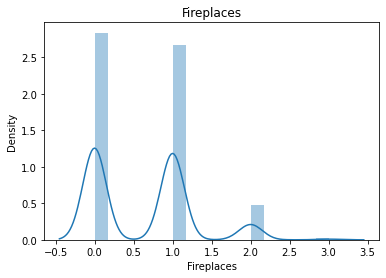

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


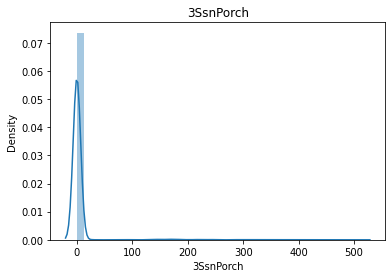

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


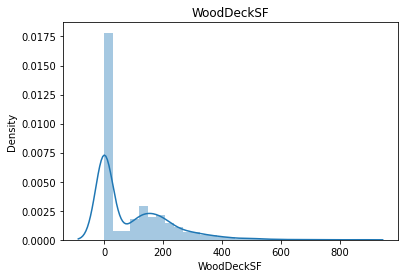

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


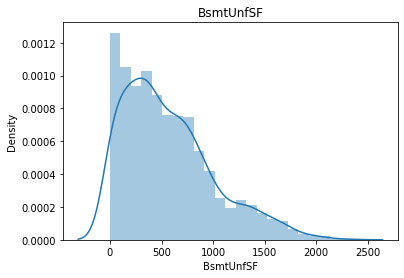

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


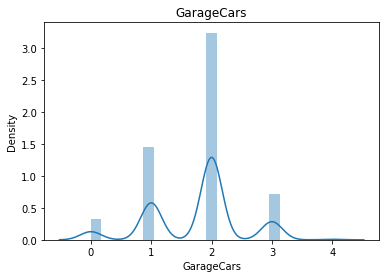

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


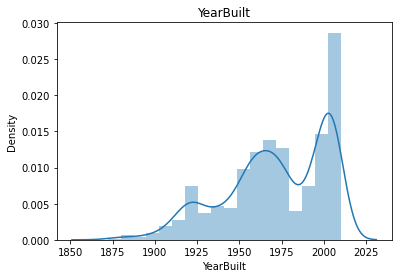

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


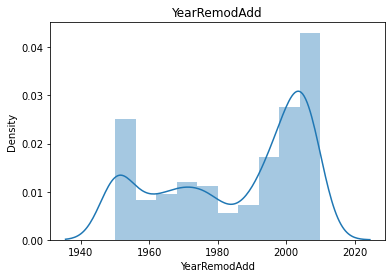

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


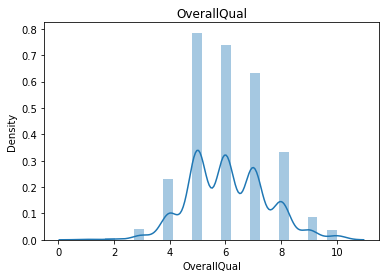

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


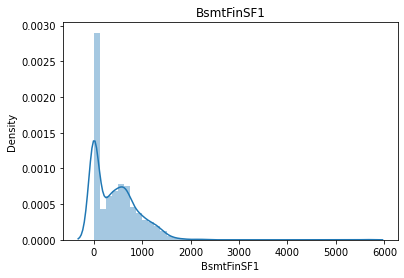

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


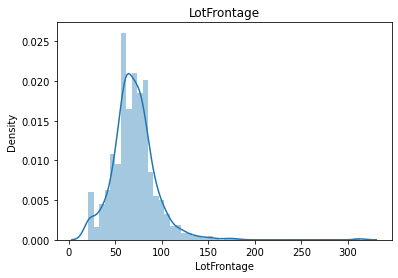

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


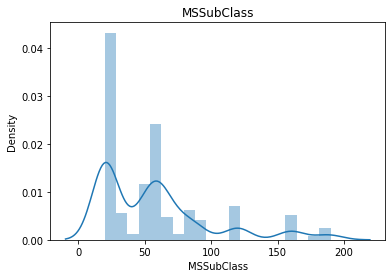

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


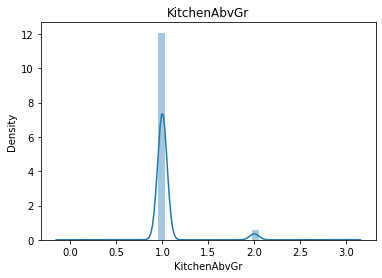

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


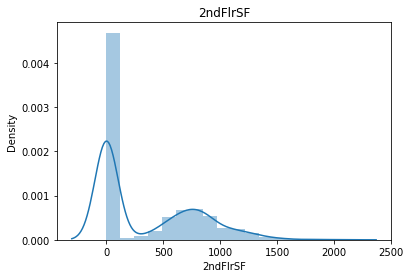

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


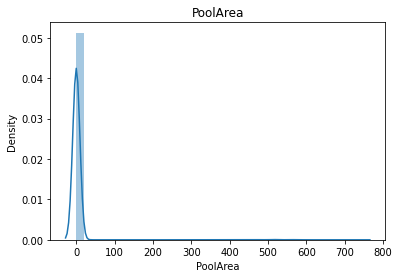

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


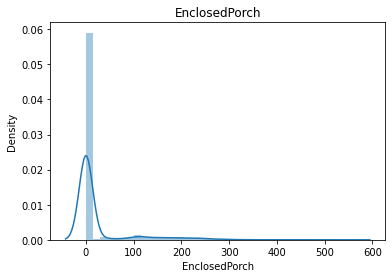

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


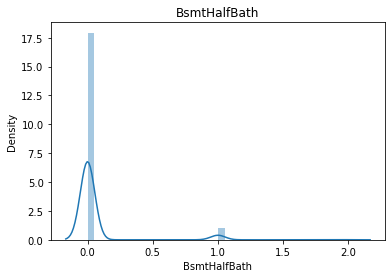

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


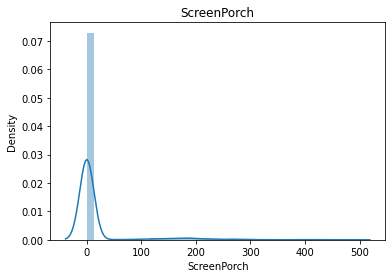

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


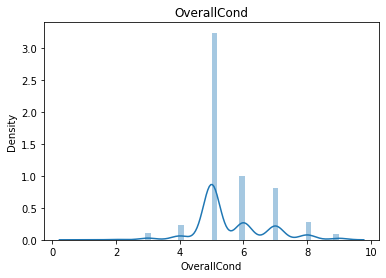

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


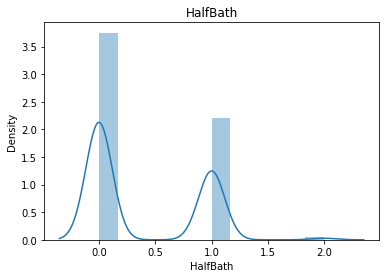

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


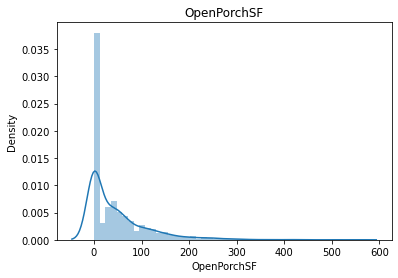

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


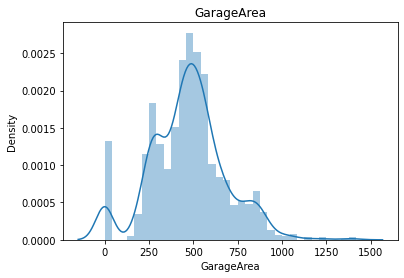

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


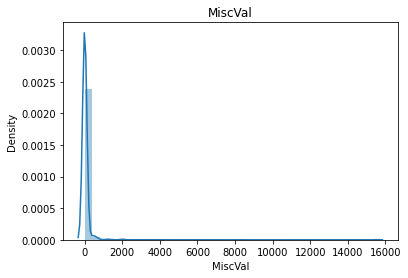

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


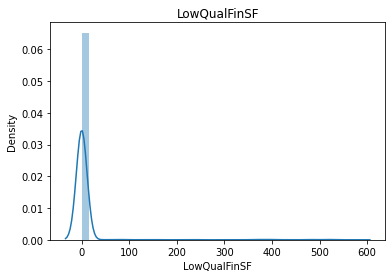

In [14]:
for feature in numerical_feature:
    data = train.copy()
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

**From this analysis, there is few features are in normal distriution other are not belongs to the Gaussian distribution, we want to convert those distribution into a Gaussian distributed**

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


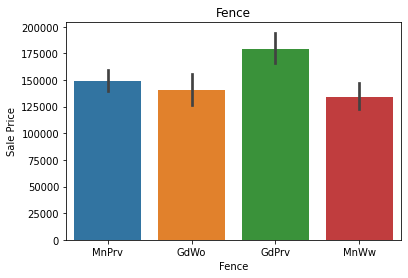

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


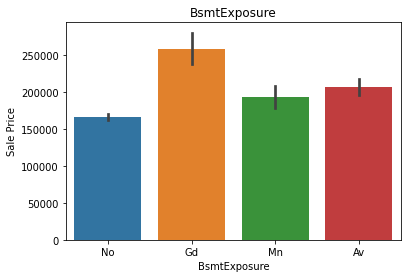

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


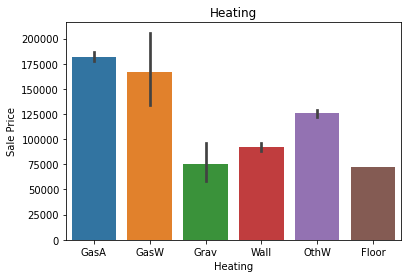

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


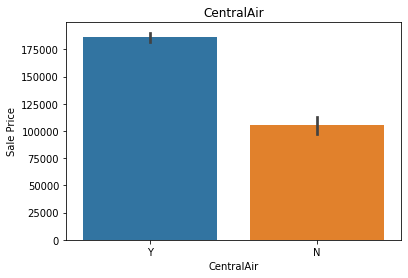

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


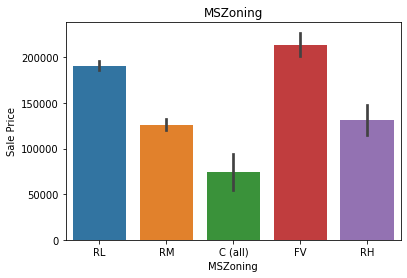

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


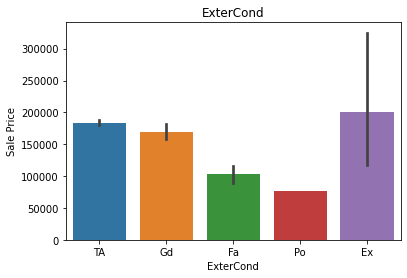

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


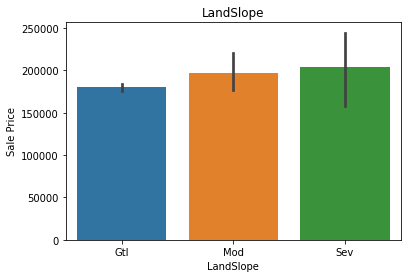

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


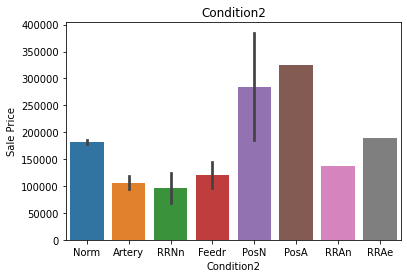

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


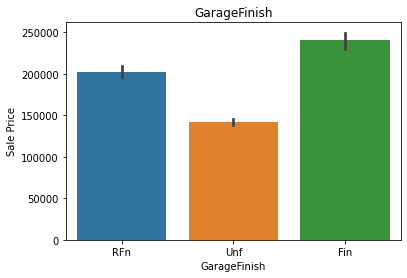

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


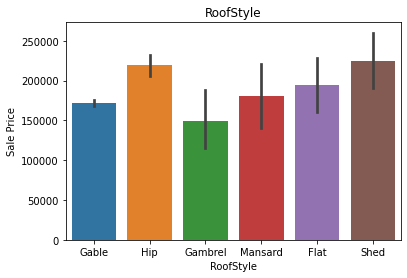

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


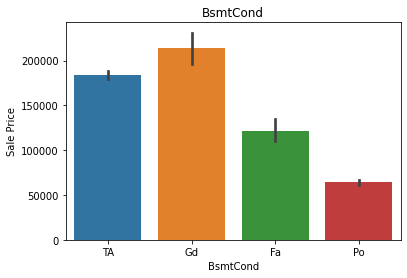

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


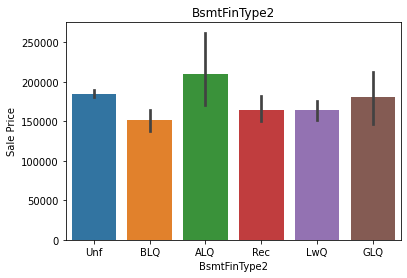

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


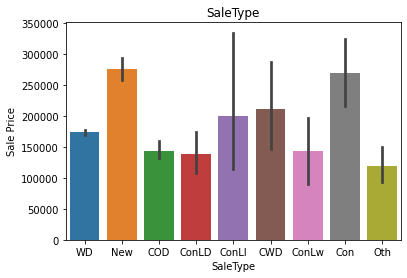

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


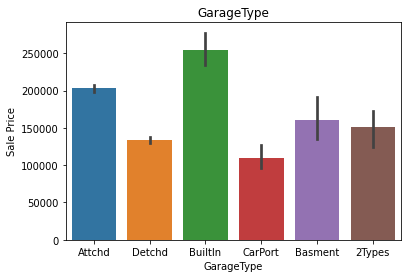

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


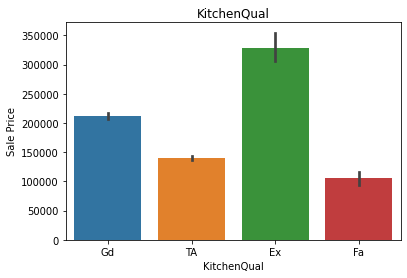

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


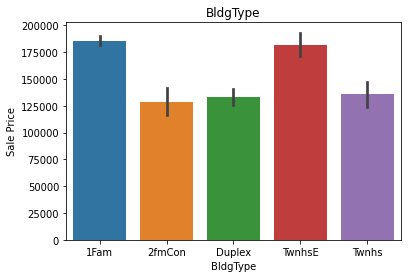

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


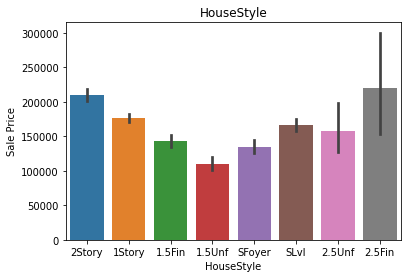

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


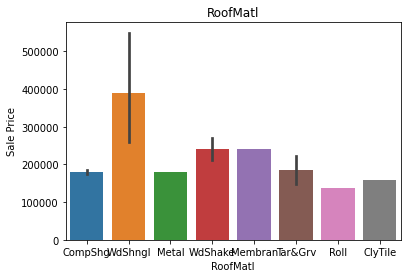

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


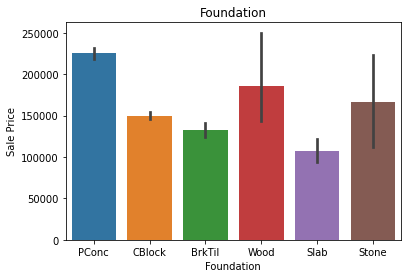

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


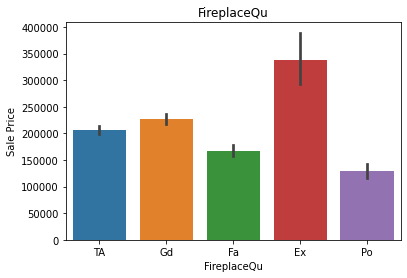

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


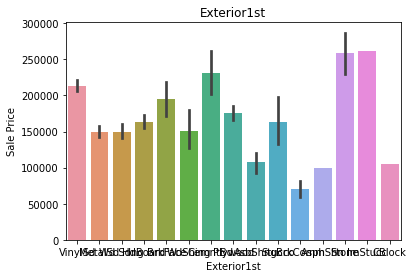

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


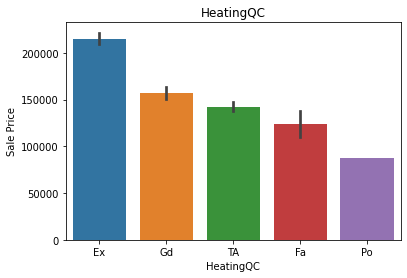

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


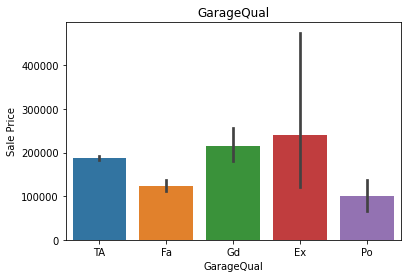

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


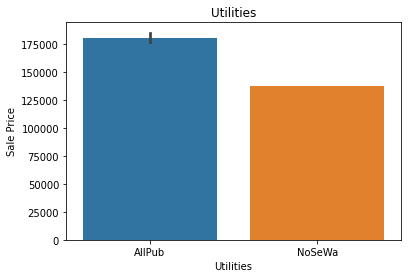

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


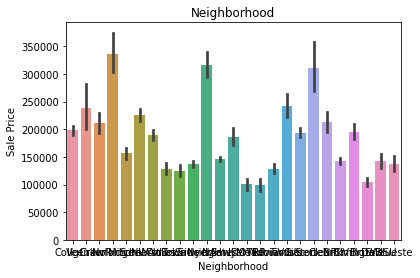

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


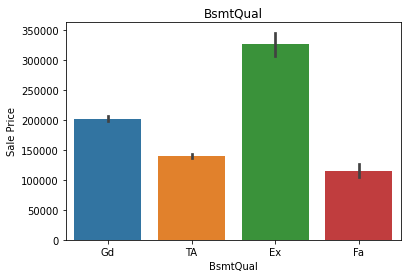

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


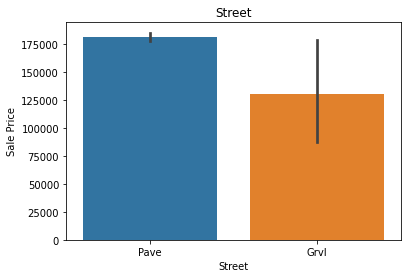

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


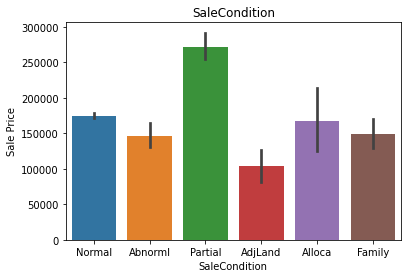

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


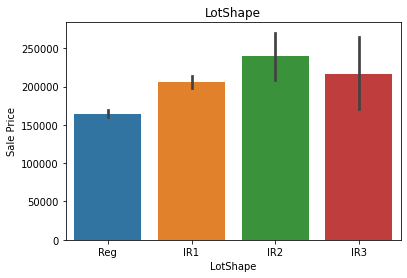

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


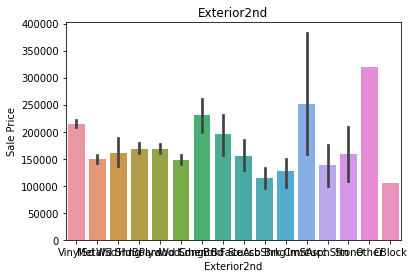

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


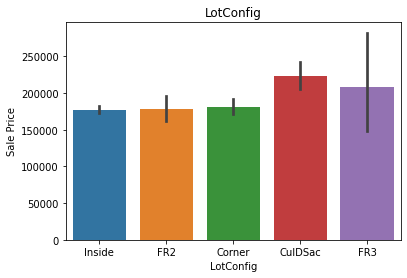

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


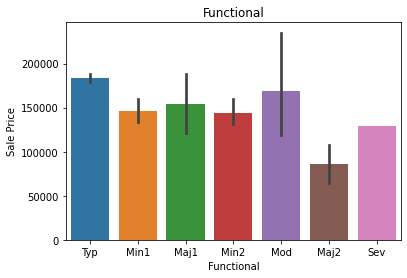

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


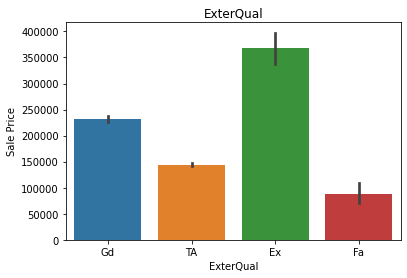

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


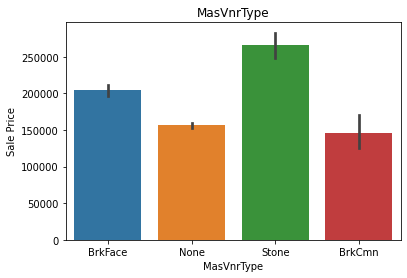

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


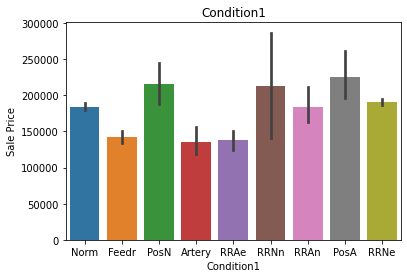

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


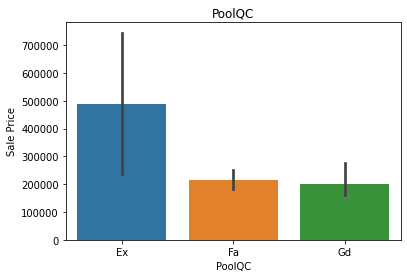

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


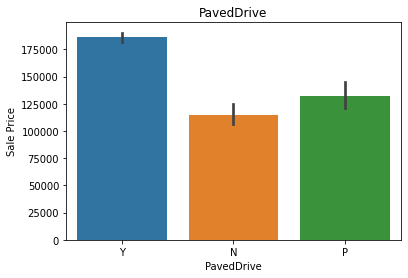

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


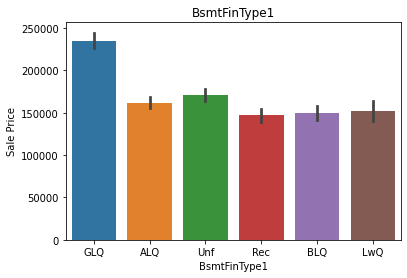

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


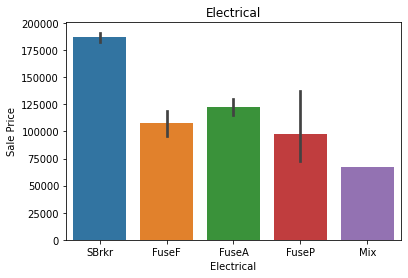

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


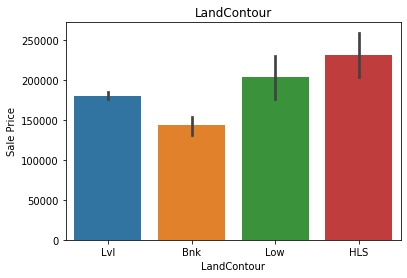

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


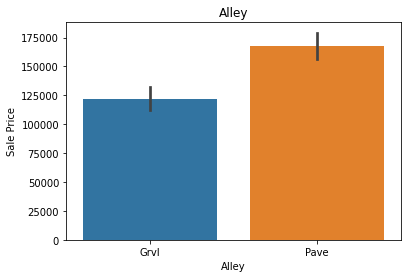

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


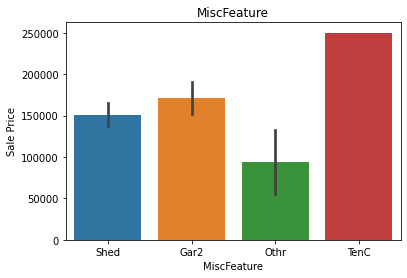

c:\users\sathi\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


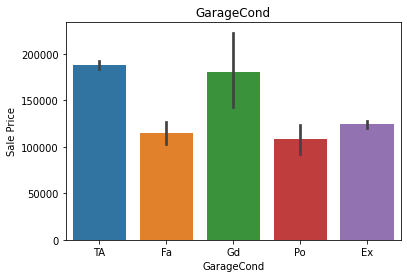

In [15]:
# plotting categorical value
for feature in categorical_feature:
    data = train.copy()
    sns.barplot(train[feature], train['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('Sale Price')
    plt.title(feature)
    plt.show()

### **Find the correlation between dependent and independent feature:**

<AxesSubplot:>

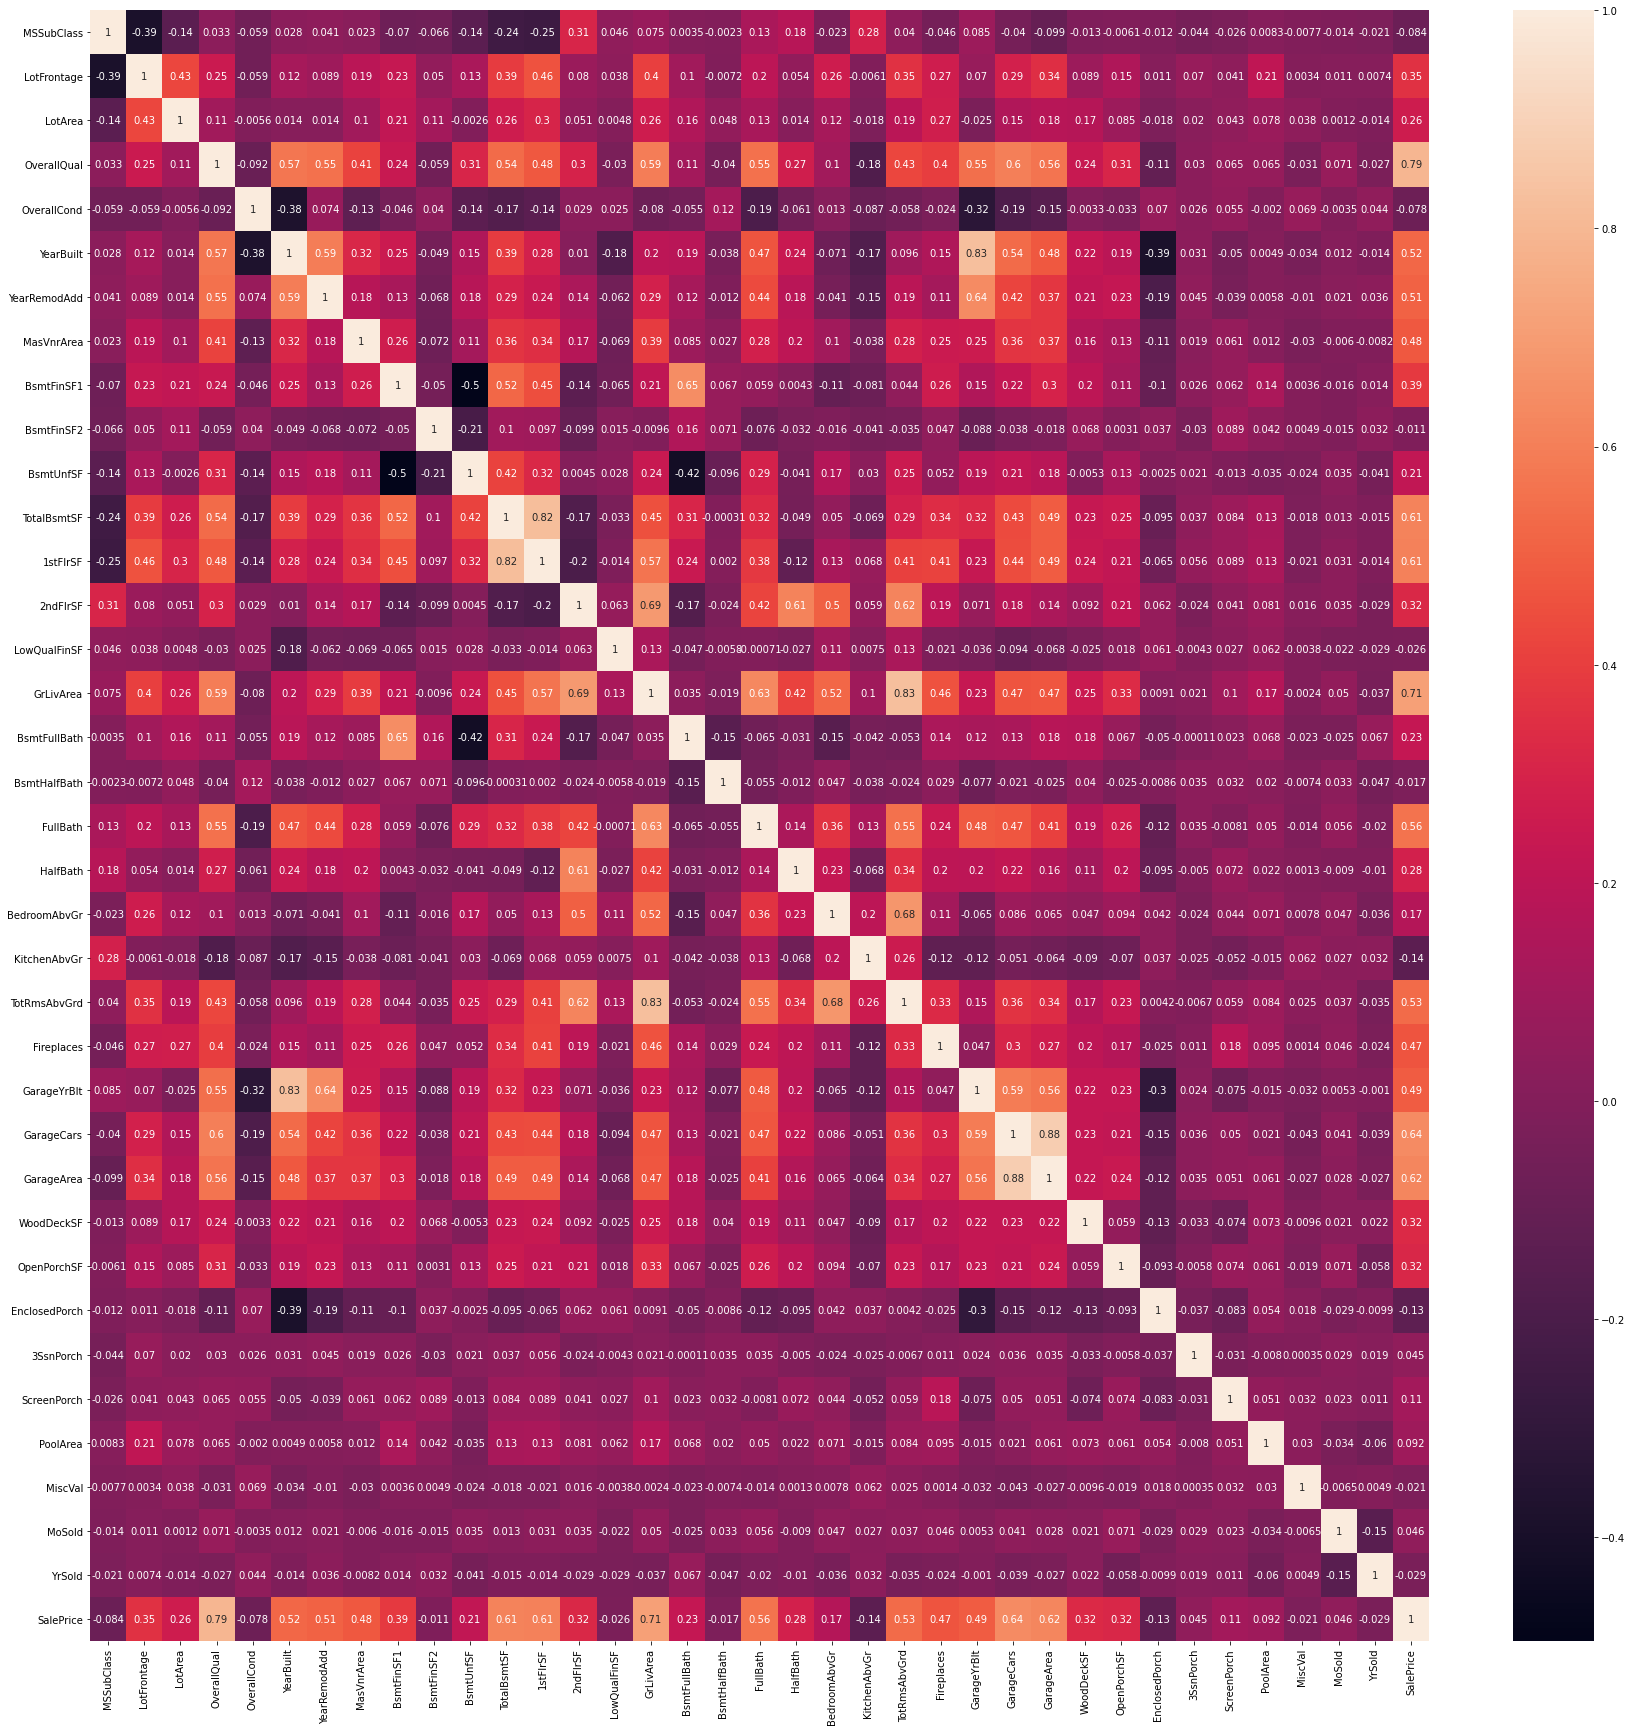

In [16]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(), annot=True)

### **Feature Engineering:** 
     In this process, cleaning all the null values with replace of mean, median, mode etc.. And replace informate values and its most important steps in machine learning. Convert the categorical feature with numerical feature for better accuray as well as fit the data into ml algorithm

In [17]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
for feature in train.columns:
    print(f"{feature} : {np.round(train[feature].isnull().mean(),2)}")

MSSubClass : 0.0
MSZoning : 0.0
LotFrontage : 0.18
LotArea : 0.0
Street : 0.0
Alley : 0.94
LotShape : 0.0
LandContour : 0.0
Utilities : 0.0
LotConfig : 0.0
LandSlope : 0.0
Neighborhood : 0.0
Condition1 : 0.0
Condition2 : 0.0
BldgType : 0.0
HouseStyle : 0.0
OverallQual : 0.0
OverallCond : 0.0
YearBuilt : 0.0
YearRemodAdd : 0.0
RoofStyle : 0.0
RoofMatl : 0.0
Exterior1st : 0.0
Exterior2nd : 0.0
MasVnrType : 0.01
MasVnrArea : 0.01
ExterQual : 0.0
ExterCond : 0.0
Foundation : 0.0
BsmtQual : 0.03
BsmtCond : 0.03
BsmtExposure : 0.03
BsmtFinType1 : 0.03
BsmtFinSF1 : 0.0
BsmtFinType2 : 0.03
BsmtFinSF2 : 0.0
BsmtUnfSF : 0.0
TotalBsmtSF : 0.0
Heating : 0.0
HeatingQC : 0.0
CentralAir : 0.0
Electrical : 0.0
1stFlrSF : 0.0
2ndFlrSF : 0.0
LowQualFinSF : 0.0
GrLivArea : 0.0
BsmtFullBath : 0.0
BsmtHalfBath : 0.0
FullBath : 0.0
HalfBath : 0.0
BedroomAbvGr : 0.0
KitchenAbvGr : 0.0
KitchenQual : 0.0
TotRmsAbvGrd : 0.0
Functional : 0.0
Fireplaces : 0.0
FireplaceQu : 0.47
GarageType : 0.06
GarageYrBlt : 0.0

##### **Cleaning Null values in Numerical feature:** 

In [19]:
# replcing null values with median
for feature in numerical_feature:
    train[feature] = train[feature].fillna(train[feature].median())

In [20]:
# list of variables that contain year information
year_feature = {feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature}
for feature in year_feature:
    if feature!='YrSold':
        ## We will capture the difference between year variable and year the house was sold for
        train[feature]=train['YrSold']-train[feature]

In [21]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [22]:
# here we saw that there is no null value in numerical feature
for feature in numerical_feature:
    print(f"{feature} : {train[feature].isnull().sum()}")

SalePrice : 0
BsmtFinSF2 : 0
GrLivArea : 0
1stFlrSF : 0
MasVnrArea : 0
YrSold : 0
LotArea : 0
TotRmsAbvGrd : 0
TotalBsmtSF : 0
BedroomAbvGr : 0
BsmtFullBath : 0
FullBath : 0
GarageYrBlt : 0
MoSold : 0
Fireplaces : 0
3SsnPorch : 0
WoodDeckSF : 0
BsmtUnfSF : 0
GarageCars : 0
YearBuilt : 0
YearRemodAdd : 0
OverallQual : 0
BsmtFinSF1 : 0
LotFrontage : 0
MSSubClass : 0
KitchenAbvGr : 0
2ndFlrSF : 0
PoolArea : 0
EnclosedPorch : 0
BsmtHalfBath : 0
ScreenPorch : 0
OverallCond : 0
HalfBath : 0
OpenPorchSF : 0
GarageArea : 0
MiscVal : 0
LowQualFinSF : 0


#### **Replacing categorical null values with String values:**

In [23]:
for feature in categorical_feature:
    print(f"{feature}: {train[feature].value_counts()}")

Fence: MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64
BsmtExposure: No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
Heating: GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64
CentralAir: Y    1365
N      95
Name: CentralAir, dtype: int64
MSZoning: RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
ExterCond: TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64
LandSlope: Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
Condition2: Norm      1445
Feedr        6
RRNn         2
Artery       2
PosN         2
RRAe         1
RRAn         1
PosA         1
Name: Condition2, dtype: int64
GarageFinish: Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64
RoofStyle: Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Na

**From this analysis we saw that there is an imbalance in the categorical feature which the value counts is higher so we not recommended to replacing null values with most frequent values**

In [24]:
for feature in categorical_feature:
    train[feature] = np.where(train[feature].isnull(), 'Missing', train[feature])

In [25]:
for feature in categorical_feature:
    print(f"{feature}: {train[feature].isnull().sum()}")

Fence: 0
BsmtExposure: 0
Heating: 0
CentralAir: 0
MSZoning: 0
ExterCond: 0
LandSlope: 0
Condition2: 0
GarageFinish: 0
RoofStyle: 0
BsmtCond: 0
BsmtFinType2: 0
SaleType: 0
GarageType: 0
KitchenQual: 0
BldgType: 0
HouseStyle: 0
RoofMatl: 0
Foundation: 0
FireplaceQu: 0
Exterior1st: 0
HeatingQC: 0
GarageQual: 0
Utilities: 0
Neighborhood: 0
BsmtQual: 0
Street: 0
SaleCondition: 0
LotShape: 0
Exterior2nd: 0
LotConfig: 0
Functional: 0
ExterQual: 0
MasVnrType: 0
Condition1: 0
PoolQC: 0
PavedDrive: 0
BsmtFinType1: 0
Electrical: 0
LandContour: 0
Alley: 0
MiscFeature: 0
GarageCond: 0


In [26]:
train.isnull().sum().sum()

0

There is null values in our data, we cleaned all null values
### Convert Categorical features into Numerical Feature by Encoding methods  
    The train dataset was in an nominal categorical data, so we use nomical encoding methods to converts the categorical data into numerical values

In [27]:
LEncoder = LabelEncoder()
for feature in categorical_feature:
    train[feature] = LEncoder.fit_transform(train[feature])

**All the categorical feature are converted into numerical feature**

In [28]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,2,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,2,1,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,1,0,3,0,4,...,0,3,2,1,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,1,0,3,0,0,...,0,3,2,1,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,1,0,3,0,2,...,0,3,2,1,0,12,2008,8,4,250000


##### **Perform Lognormal distribution for the Numerical values which are not Normal distributed**

In [29]:
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    train[feature]=np.log(train[feature])

In [30]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,4.174387,9.041922,1,1,3,3,0,4,...,0,3,2,1,0,2,2008,8,4,12.247694
1,20,3,4.382027,9.169518,1,1,3,3,0,2,...,0,3,2,1,0,5,2007,8,4,12.109011
2,60,3,4.219508,9.328123,1,1,0,3,0,4,...,0,3,2,1,0,9,2008,8,4,12.317167
3,70,3,4.094345,9.164296,1,1,0,3,0,0,...,0,3,2,1,0,2,2006,8,0,11.849398
4,60,3,4.430817,9.565214,1,1,0,3,0,2,...,0,3,2,1,0,12,2008,8,4,12.429216


### **Feature Scaling:**
    In this dataset, we use MinMaxScaler for better performance bcoz we dont have negative value so use range between 0 to 1

In [31]:
feature_scaling = {feature for feature in train.columns if 'SalePrice' not in feature}

In [32]:
MMS = MinMaxScaler()
MMS.fit(train)
MMS.transform(train)

array([[0.23529412, 0.75      , 0.41820812, ..., 1.        , 0.8       ,
        0.58143069],
       [0.        , 0.75      , 0.49506375, ..., 1.        , 0.8       ,
        0.53631912],
       [0.23529412, 0.75      , 0.434909  , ..., 1.        , 0.8       ,
        0.60402899],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 1.        , 0.8       ,
        0.66126699],
       [0.        , 0.75      , 0.434909  , ..., 1.        , 0.8       ,
        0.45677119],
       [0.        , 0.75      , 0.47117546, ..., 1.        , 0.8       ,
        0.46884616]])

**Apply Feature Selection.First, I specify the Lasso Regression model, and I select a suitable alpha (equivalent of penalty).The bigger the alpha the less features that will be selected.Then I use the selectFromModel object from sklearn, which will select the features which coefficients are non-zero**

In [33]:
X_train = train.drop(['SalePrice'], axis=1)
y_train = train[['SalePrice']]

In [34]:
feature_selection = SelectFromModel(Lasso(alpha=0.005, random_state=0))# remember the random state in this function
feature_selection.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [35]:
feature_selection.get_support()

array([ True, False, False,  True, False, False,  True, False, False,
       False, False,  True, False, False, False,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False,  True, False, False,  True])

In [36]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feature = X_train.columns[(feature_selection.get_support())]

# let's print some stats
print(f'total features: {X_train.shape[1]}')
print(f'selected features: {len(selected_feature)}')

total features: 79
selected features: 45


In [37]:
selected_feature

Index(['MSSubClass', 'LotArea', 'LotShape', 'Neighborhood', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofMatl',
       'Exterior1st', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MoSold', 'SaleCondition'],
      dtype='object')

In [38]:
X_train = X_train[selected_feature]
X_train.head()

,MSSubClass,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,...,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleCondition
0,60,9.041922,3,5,5,7,5,5,5,1,...,5,2,0,61,0,0,0,0,2,4
1,20,9.169518,3,24,2,6,8,31,31,1,...,5,2,298,0,0,0,0,0,5,4
2,60,9.328123,0,5,5,7,5,7,6,1,...,5,2,0,42,0,0,0,0,9,4
3,70,9.164296,0,6,5,7,5,91,36,1,...,5,2,0,35,272,0,0,0,2,0
4,60,9.565214,0,15,5,8,5,8,8,1,...,5,2,192,84,0,0,0,0,12,4


In [39]:
y_train.head()

,SalePrice
0,12.247694
1,12.109011
2,12.317167
3,11.849398
4,12.429216


### **Perform Same method to test data set**

In [40]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [41]:
numerical_feature = {feature for feature in test.columns if test[feature].dtypes != 'O'}
print(f"Total no of Numerical feature : {len(numerical_feature)}")
print(f'Numerical Feature are: {numerical_feature}')

Total no of Numerical feature : 37
Numerical Feature are: {'BsmtFinSF2', 'GrLivArea', '1stFlrSF', 'MasVnrArea', 'YrSold', 'LotArea', 'Id', 'TotRmsAbvGrd', 'TotalBsmtSF', 'BedroomAbvGr', 'BsmtFullBath', 'FullBath', 'GarageYrBlt', 'MoSold', 'Fireplaces', '3SsnPorch', 'WoodDeckSF', 'BsmtUnfSF', 'GarageCars', 'YearBuilt', 'YearRemodAdd', 'OverallQual', 'BsmtFinSF1', 'LotFrontage', 'MSSubClass', 'KitchenAbvGr', '2ndFlrSF', 'PoolArea', 'EnclosedPorch', 'BsmtHalfBath', 'ScreenPorch', 'OverallCond', 'HalfBath', 'OpenPorchSF', 'GarageArea', 'MiscVal', 'LowQualFinSF'}


In [42]:
# replcing null values with median
for feature in numerical_feature:
    test[feature] = test[feature].fillna(test[feature].median())
    

In [43]:
# list of variables that contain year information
year_feature = {feature for feature in numerical_feature if 'Yr' in feature or 'Year' in feature}
for feature in year_feature:
    if feature!='YrSold':
        ## We will capture the difference between year variable and year the house was sold for
        test[feature]=test['YrSold']-test[feature]

for feature in categorical_feature:
    test[feature] = np.where(test[feature].isnull(), 'Missing', test[feature])
    
# convert categorical data into numerical data
LEncoder = LabelEncoder()
for feature in categorical_feature:
    test[feature] = LEncoder.fit_transform(test[feature])

# Any distribution into Gaussian Distribution
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

for feature in num_features:
    test[feature]=np.log(test[feature])

# Feature scaling
MMS = MinMaxScaler()
MMS.fit(test)
MMS.transform(test)

test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,3,4.382027,9.360655,1,1,3,3,0,...,120,0,2,3,1,0,6,2010,9,4
1,1462,20,4,4.394449,9.565704,1,1,0,3,0,...,0,0,2,2,0,12500,6,2010,9,4
2,1463,60,4,4.304065,9.534595,1,1,0,3,0,...,0,0,2,3,1,0,3,2010,9,4
3,1464,60,4,4.356709,9.208138,1,1,0,3,0,...,0,0,2,2,1,0,6,2010,9,4
4,1465,120,4,3.761200,8.518193,1,1,0,1,0,...,144,0,2,2,1,0,1,2010,9,4


In [104]:
submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')
submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [108]:
test['SalePrice'] = submission.SalePrice
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,3,4.382027,9.360655,1,1,3,3,0,4,0,12,1,2,0,2,5,6,49,49,1,0,11,13,3,0.0,3,4,1,4,4,4,5,468.0,3,144.0,270.0,882.0,0,4,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,4,5,7,0,3,1,49.0,3,1.0,730.0,4,5,2,140,0,0,0,120,0,2,3,1,0,6,2010,9,4,169277.052498
1,1462,20,4,4.394449,9.565704,1,1,0,3,0,0,0,12,2,2,0,2,6,6,52,52,3,0,12,14,1,108.0,3,4,1,4,4,4,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2,6,7,0,3,1,52.0,3,1.0,312.0,4,5,2,393,36,0,0,0,0,2,2,0,12500,6,2010,9,4,187758.393989
2,1463,60,4,4.304065,9.534595,1,1,0,3,0,4,0,8,2,2,0,4,5,5,13,12,1,0,11,13,3,0.0,3,4,2,2,4,4,2,791.0,6,0.0,137.0,928.0,0,2,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,4,6,7,1,5,1,13.0,0,2.0,482.0,4,5,2,212,34,0,0,0,0,2,3,1,0,3,2010,9,4,183583.683570
3,1464,60,4,4.356709,9.208138,1,1,0,3,0,4,0,8,2,2,0,4,6,6,12,12,1,0,11,13,1,20.0,3,4,2,4,4,4,2,602.0,6,0.0,324.0,926.0,0,0,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2,7,7,1,2,1,12.0,0,2.0,470.0,4,5,2,360,36,0,0,0,0,2,2,1,0,6,2010,9,4,179317.477511
4,1465,120,4,3.761200,8.518193,1,1,0,1,0,4,0,22,2,2,4,2,8,5,18,18,1,0,6,6,3,0.0,2,4,2,2,4,4,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2,5,7,0,3,1,18.0,2,2.0,506.0,4,5,2,0,82,0,0,144,0,2,2,1,0,1,2010,9,4,150730.079977


In [109]:
X_test = test.drop(['Id', 'SalePrice'], axis=1)
y_test = test[['SalePrice']]
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,3,4.382027,9.360655,1,1,3,3,0,4,0,12,1,2,0,2,5,6,49,49,1,0,11,13,3,0.0,3,4,1,4,4,4,5,468.0,3,144.0,270.0,882.0,0,4,1,3,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,4,5,7,0,3,1,49.0,3,1.0,730.0,4,5,2,140,0,0,0,120,0,2,3,1,0,6,2010,9,4
1,20,4,4.394449,9.565704,1,1,0,3,0,0,0,12,2,2,0,2,6,6,52,52,3,0,12,14,1,108.0,3,4,1,4,4,4,0,923.0,6,0.0,406.0,1329.0,0,4,1,3,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,2,6,7,0,3,1,52.0,3,1.0,312.0,4,5,2,393,36,0,0,0,0,2,2,0,12500,6,2010,9,4
2,60,4,4.304065,9.534595,1,1,0,3,0,4,0,8,2,2,0,4,5,5,13,12,1,0,11,13,3,0.0,3,4,2,2,4,4,2,791.0,6,0.0,137.0,928.0,0,2,1,3,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,4,6,7,1,5,1,13.0,0,2.0,482.0,4,5,2,212,34,0,0,0,0,2,3,1,0,3,2010,9,4
3,60,4,4.356709,9.208138,1,1,0,3,0,4,0,8,2,2,0,4,6,6,12,12,1,0,11,13,1,20.0,3,4,2,4,4,4,2,602.0,6,0.0,324.0,926.0,0,0,1,3,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,2,7,7,1,2,1,12.0,0,2.0,470.0,4,5,2,360,36,0,0,0,0,2,2,1,0,6,2010,9,4
4,120,4,3.761200,8.518193,1,1,0,1,0,4,0,22,2,2,4,2,8,5,18,18,1,0,6,6,3,0.0,2,4,2,2,4,4,0,263.0,6,0.0,1017.0,1280.0,0,0,1,3,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,2,5,7,0,3,1,18.0,2,2.0,506.0,4,5,2,0,82,0,0,144,0,2,2,1,0,1,2010,9,4


In [110]:
feature_selection = SelectFromModel(Lasso(alpha=0.005, random_state=0))# remember the random state in this function
feature_selection.fit(X_test, y_test)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [111]:
# let's print some stats
print(f'total features: {X_test.shape[1]}')
print(f'selected features: {len(selected_feature)}')

X_test = X_test[selected_feature]
X_test.head()

total features: 79
selected features: 45


,MSSubClass,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleCondition
0,20,9.360655,3,12,2,5,6,49,49,0,11,0.0,4,4,4,5,468.0,144.0,270.0,882.0,4,6.797940,0,0,0.0,4,5,7,0,3,1,49.0,3,1.0,730.0,5,2,140,0,0,0,120,0,6,4
1,20,9.565704,0,12,2,6,6,52,52,0,12,108.0,4,4,4,0,923.0,0.0,406.0,1329.0,4,7.192182,0,0,0.0,2,6,7,0,3,1,52.0,3,1.0,312.0,5,2,393,36,0,0,0,0,6,4
2,60,9.534595,0,8,4,5,5,13,12,0,11,0.0,2,4,4,2,791.0,0.0,137.0,928.0,2,6.833032,701,0,0.0,4,6,7,1,5,1,13.0,0,2.0,482.0,5,2,212,34,0,0,0,0,3,4
3,60,9.208138,0,8,4,6,6,12,12,0,11,20.0,4,4,4,2,602.0,0.0,324.0,926.0,0,6.830874,678,0,0.0,2,7,7,1,2,1,12.0,0,2.0,470.0,5,2,360,36,0,0,0,0,6,4
4,120,8.518193,0,22,2,8,5,18,18,0,6,0.0,2,4,4,0,263.0,0.0,1017.0,1280.0,0,7.154615,0,0,0.0,2,5,7,0,3,1,18.0,2,2.0,506.0,5,2,0,82,0,0,144,0,1,4


In [113]:
X_test = X_test[selected_feature]
X_test.head()
#y_test.head()

,MSSubClass,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,Exterior1st,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,SaleCondition
0,20,9.360655,3,12,2,5,6,49,49,0,11,0.0,4,4,4,5,468.0,144.0,270.0,882.0,4,6.797940,0,0,0.0,4,5,7,0,3,1,49.0,3,1.0,730.0,5,2,140,0,0,0,120,0,6,4
1,20,9.565704,0,12,2,6,6,52,52,0,12,108.0,4,4,4,0,923.0,0.0,406.0,1329.0,4,7.192182,0,0,0.0,2,6,7,0,3,1,52.0,3,1.0,312.0,5,2,393,36,0,0,0,0,6,4
2,60,9.534595,0,8,4,5,5,13,12,0,11,0.0,2,4,4,2,791.0,0.0,137.0,928.0,2,6.833032,701,0,0.0,4,6,7,1,5,1,13.0,0,2.0,482.0,5,2,212,34,0,0,0,0,3,4
3,60,9.208138,0,8,4,6,6,12,12,0,11,20.0,4,4,4,2,602.0,0.0,324.0,926.0,0,6.830874,678,0,0.0,2,7,7,1,2,1,12.0,0,2.0,470.0,5,2,360,36,0,0,0,0,6,4
4,120,8.518193,0,22,2,8,5,18,18,0,6,0.0,2,4,4,0,263.0,0.0,1017.0,1280.0,0,7.154615,0,0,0.0,2,5,7,0,3,1,18.0,2,2.0,506.0,5,2,0,82,0,0,144,0,1,4


In [114]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1460, 45)
(1459, 45)
(1460, 1)
(1459, 1)


### **Hyperparameter Tunning:** 
 **After Completed the feature Selection then apply into algorithm those dataset one remaining thing is to create an hyperparameter for getting more accuracy results and best fits withs the algorithm**

In [133]:
# Instantiate a dict (+function) for storing model scores
scores = {}
def get_cv_score(estimator):
    return np.sqrt(-1 * cross_val_score(estimator, X=X_train, y=y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1))

In [134]:
# Start with LinearRegressor Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

scores['linear_regression'] = get_cv_score(lin_reg)
scores['linear_regression']

array([0.11648099, 0.14941978, 0.13412245, 0.12466858, 0.17036228])

In [ ]:
# SVM with Linear Kernel
linear_svr = SVR(kernel='linear', 
                     C=10, 
                     epsilon=0.01, 
                     gamma=0.0005)
scores['linear_svr'] = get_cv_score(linear_svr)

In [ ]:
# SVM with RBF kernel
svr = SVR(kernel='rbf', 
              C=10, 
              epsilon=0.01, 
              gamma=0.0005)
scores['svr'] = get_cv_score(svr)

In [137]:
# Random Forest
rfr = RandomForestRegressor(n_estimators=250, 
                                max_depth=15, 
                                min_samples_leaf=5, 
                                min_samples_split=5, 
                                n_jobs=-1,
                               random_state=42)
scores['rfr'] = get_cv_score(rfr)

In [138]:
# Gradient Boosting
gbr = GradientBoostingRegressor(n_estimators=350, 
                                    learning_rate=0.1, 
                                    loss='huber',
                                   random_state=42)
scores['gbr'] = get_cv_score(gbr)

In [139]:
# LGBM
lgbr = LGBMRegressor(objective='regression',
                        n_estimators=300,
                        learning_rate=0.1,
                        random_state=42)
scores['lgbr'] = get_cv_score(lgbr)

In [140]:
# AdaBoost with DT Base Estimator
ada = AdaBoostRegressor(n_estimators=150, 
                            random_state=42)
scores['ada'] = get_cv_score(ada)

In [141]:
# Ending with XGBoost
xgb = XGBRegressor(n_estimators=300,
                      max_depth=5, 
                      learning_rate=0.1,
                      random_state=42)
scores['xgb'] = get_cv_score(xgb)

In [142]:
# Evaluate models before any serious Hyperparameter tuning
print(f"AdaBoost: {scores['ada'].mean()}")
print(f"LGBM: {scores['lgbr'].mean()}")
print(f"GradientBoosting: {scores['gbr'].mean()}")
print(f"RandomForest: {scores['rfr'].mean()}")
#print(f"Linear SVR: {scores['linear_svr'].mean()}")
#print(f"Kernel SVR: {scores['svr'].mean()}")
print(f"XGBoost: {scores['xgb'].mean()}")

AdaBoost: 0.1758883235466105
LGBM: 0.13623391090413256
GradientBoosting: 0.13241748009227394
RandomForest: 0.15122814223511713


KeyError: 'linear_svr'

In [143]:
# Light Gradient Boosting Regressor
lightgbm = LGBMRegressor(objective='regression', 
                       num_leaves=6,
                       learning_rate=0.01, 
                       n_estimators=7000,
                       max_bin=200, 
                       bagging_fraction=0.8,
                       bagging_freq=4, 
                       bagging_seed=8,
                       feature_fraction=0.2,
                       feature_fraction_seed=8,
                       min_sum_hessian_in_leaf = 11,
                       verbose=-1,
                       random_state=42)

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,
                       n_estimators=6000,
                       max_depth=4,
                       min_child_weight=0,
                       gamma=0.6,
                       subsample=0.7,
                       colsample_bytree=0.7,
                       nthread=-1,
                       scale_pos_weight=1,
                       seed=27,
                       reg_alpha=0.00006,
                       random_state=42)


# Support Vector Regressor
svr = SVR(C= 20, epsilon= 0.008, gamma=0.0003)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=6000,
                                learning_rate=0.01,
                                max_depth=4,
                                max_features='sqrt',
                                min_samples_leaf=15,
                                min_samples_split=10,
                                loss='huber',
                                random_state=42)  

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=2200,
                          max_depth=15,
                          min_samples_split=5,
                          min_samples_leaf=5,
                          max_features=None,
                          oob_score=True,
                          random_state=42)

# Stack up all the models above, optimized using xgboost
stack_gen = StackingRegressor(estimators=[
                                ('xgboost',xgboost), 
                                ('lightgbm',lightgbm), 
                                ('svr',svr),  
                                ('gbr',gbr), 
                                ('rf',rf)],
                                final_estimator=xgboost,
                                n_jobs=-1)


**We make use of a StackingRegressor which takes collection of models and aggregates their predictions by having a meta-learner treat it as independent variables and the true values as the targets. This is another form of Ensembling.**

### **Fit Model With an Algorithm:** 

In [144]:
# Stacking Regressor algorithm
stack_gen.fit(X_train, y_train)


[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4
[LightGBM] [Warning] baggi

StackingRegressor(estimators=[('xgboost',
                               XGBRegressor(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.7, gamma=0.6,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=0.01,
                                            max_delta_step=None, max_depth=4,
                                            min_child_weight=0, missing=nan,
                                            monotone_constraints=None,
                                            n_estimators=6000, n...
                                               interaction_constraints=None,
                                               learning_rate=0.01,
              

In [145]:
# Random Forest algorithm
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, max_features=None, min_samples_leaf=5,
                      min_samples_split=5, n_estimators=2200, oob_score=True,
                      random_state=42)

In [146]:
# XGBoost algorithm
xgboost.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0.6, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=4,
             min_child_weight=0, missing=nan, monotone_constraints='()',
             n_estimators=6000, n_jobs=4, nthread=-1, num_parallel_tree=1,
             random_state=42, reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.7, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [147]:
# Gradient Boost algorithm
gbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=6000,
                          random_state=42)

In [148]:
# SVR algorithm
svr.fit(X_train, y_train)

SVR(C=20, epsilon=0.008, gamma=0.0003)

In [149]:
# LGBM
lightgbm.fit(X_train, y_train)

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


LGBMRegressor(bagging_fraction=0.8, bagging_freq=4, bagging_seed=8,
              feature_fraction=0.2, feature_fraction_seed=8, learning_rate=0.01,
              max_bin=200, min_sum_hessian_in_leaf=11, n_estimators=7000,
              num_leaves=6, objective='regression', random_state=42,
              verbose=-1)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [150]:
0.1 + 0.2 + 0.2 + 0.1 + 0.05 + 0.35

1.0

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [151]:
def predictions(X):
    return ((0.1 * svr.predict(X)) + \
            (0.2 * gbr.predict(X)) + \
            (0.2 * xgboost.predict(X)) + \
            (0.1 * lightgbm.predict(X)) + \
            (0.05 * rf.predict(X)) + \
            (0.35 * stack_gen.predict(X)))

In [158]:
predictions(X_test)

array([11.76928509, 11.98790621, 12.06574917, ..., 12.01797726,
       11.74200536, 12.27143801])

In [153]:
# Get the submission file ready, Remember to invert the log transform we applied earlier
submission = pd.read_csv("../input/house-prices-advanced-regression-techniques/sample_submission.csv")
submission.iloc[:,1] = np.floor(np.expm1(predictions(X_test)))

submission.to_csv("submission_regression.csv", index=False)

In [154]:
print("That's All for this one")

That's All for this one
